# Prosper Loan Dataset Investigation

## Preliminary Wrangling

>this dataset is containing information about borrowers's status like occupation, income range, loan amount, loss, return and more, which will help us defining who has more chance of accepting his loan request

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

>i decided to to work with **16** of these variables.

there are two questions we want to answer beside investigating all variables and the relation between every variable and other


- **Q1. What factors affect a LoanStatus and BorrowerRate?**
- **Q2. Are there differences between loans depending on how large the original loan amount was?**

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None  # default='warn'

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv('/home/muhammad/Desktop/communicate-data-project-template/Project Template/prosperLoanData.csv')
pd.set_option('display.max_columns', None)
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
#now we are showing types of data variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#now choosing features we will work with
df2 = df[['CreditGrade','Term','LoanStatus','ClosedDate','BorrowerAPR','BorrowerRate','ProsperRating (numeric)', 'ProsperRating (Alpha)','ListingCategory (numeric)','Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','Recommendations','Investors','LoanOriginalAmount']]
df2.head(1)

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,Recommendations,Investors,LoanOriginalAmount
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,NaN,NaN,0,Other,Self-employed,True,"$25,000-49,999",0,258,9425


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CreditGrade                28953 non-null   object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   ProsperRating (numeric)    84853 non-null   float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ListingCategory (numeric)  113937 non-null  int64  
 9   Occupation                 110349 non-null  object 
 10  EmploymentStatus           111682 non-null  object 
 11  IsBorrowerHomeowner        113937 non-null  bool   
 12  IncomeRange                113937 non-null  object 
 13  Recommendations            11

In [6]:
#defining the null values for every feature in our new dataset
df2.isnull().sum()

CreditGrade                  84984
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
ProsperRating (numeric)      29084
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
IncomeRange                      0
Recommendations                  0
Investors                        0
LoanOriginalAmount               0
dtype: int64

In [7]:
#now we fill the nan values
df2['EmploymentStatus']= df2['EmploymentStatus'].fillna('Employed')

df2['Occupation']= df2['Occupation'].fillna('Other')

df2['ProsperRating (Alpha)']= df2['ProsperRating (Alpha)'].fillna('C')

df2['ProsperRating (numeric)']= df2['ProsperRating (numeric)'].fillna(4.0)

df2['BorrowerAPR' ]= df2['BorrowerAPR' ].fillna(df2['BorrowerAPR'].mean())


In [8]:
#drop the nan rows according to ClosedDate variable
df2 = df2.dropna(subset = ['ClosedDate'], axis = 0)

In [9]:
#let's now extract the year from ClosedDate feature 
df2['ClosedDate_year'] = pd.DatetimeIndex(df2['ClosedDate']).year
df2.head(1)

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,Recommendations,Investors,LoanOriginalAmount,ClosedDate_year
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,4.0,C,0,Other,Self-employed,True,"$25,000-49,999",0,258,9425,2009


In [10]:
#we won't care about filling NaNs in CreditGrade because we will needed it in only one plot
df2.isnull().sum()

CreditGrade                  26136
Term                             0
LoanStatus                       0
ClosedDate                       0
BorrowerAPR                      0
BorrowerRate                     0
ProsperRating (numeric)          0
ProsperRating (Alpha)            0
ListingCategory (numeric)        0
Occupation                       0
EmploymentStatus                 0
IsBorrowerHomeowner              0
IncomeRange                      0
Recommendations                  0
Investors                        0
LoanOriginalAmount               0
ClosedDate_year                  0
dtype: int64

In [11]:
df2.shape

(55089, 17)

In [12]:
df2.describe()

,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),Recommendations,Investors,LoanOriginalAmount,ClosedDate_year
count,55089.000000,55089.000000,55089.000000,55089.000000,55089.000000,55089.000000,55089.000000,55089.000000,55089.000000
mean,36.942765,0.222191,0.200422,3.840876,2.407377,0.089383,104.890377,6261.478698,2010.693968
std,7.333153,0.088155,0.081289,1.257934,3.397736,0.453747,108.891262,5217.708845,2.045134
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,1.000000,1000.000000,2005.000000
25%,36.000000,0.149740,0.135000,4.000000,0.000000,0.000000,31.000000,2600.000000,2009.000000
50%,36.000000,0.214340,0.194500,4.000000,1.000000,0.000000,69.000000,4500.000000,2011.000000
75%,36.000000,0.295100,0.269900,4.000000,3.000000,0.000000,142.000000,8000.000000,2013.000000
max,60.000000,0.512290,0.497500,7.000000,20.000000,39.000000,1189.000000,35000.000000,2014.000000


### What is the structure of your dataset?

In [13]:
print('the main dataset structure is ',df.shape, 'and the the structure after choosing specific variables is ',df2.shape)

the main dataset structure is  (113937, 81) and the the structure after choosing specific variables is  (55089, 17)


### What is/are the main feature(s) of interest in your dataset?
LoanStatus, BorrowerAPR and BorrowerRate
       
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

'Term', 'LoanStatus', 'ClosedDate','BorrowerRate',
       , 'Occupation', 'EmploymentStatus',
       'IsBorrowerHomeowner', 'IncomeRange', 'Recommendations',
       'Investors', 'LoanOriginalAmount'

## Univariate Exploration


In [14]:
#defining categorical and numerical variables in separated lists
categorical_vars = ['CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus','IsBorrowerHomeowner', 'IncomeRange']

numerical_vars = ['BorrowerAPR','BorrowerRate', 'ProsperRating (numeric)','ListingCategory (numeric)', 'Recommendations','Investors','LoanOriginalAmount']

### detecting outliers for numerical variables

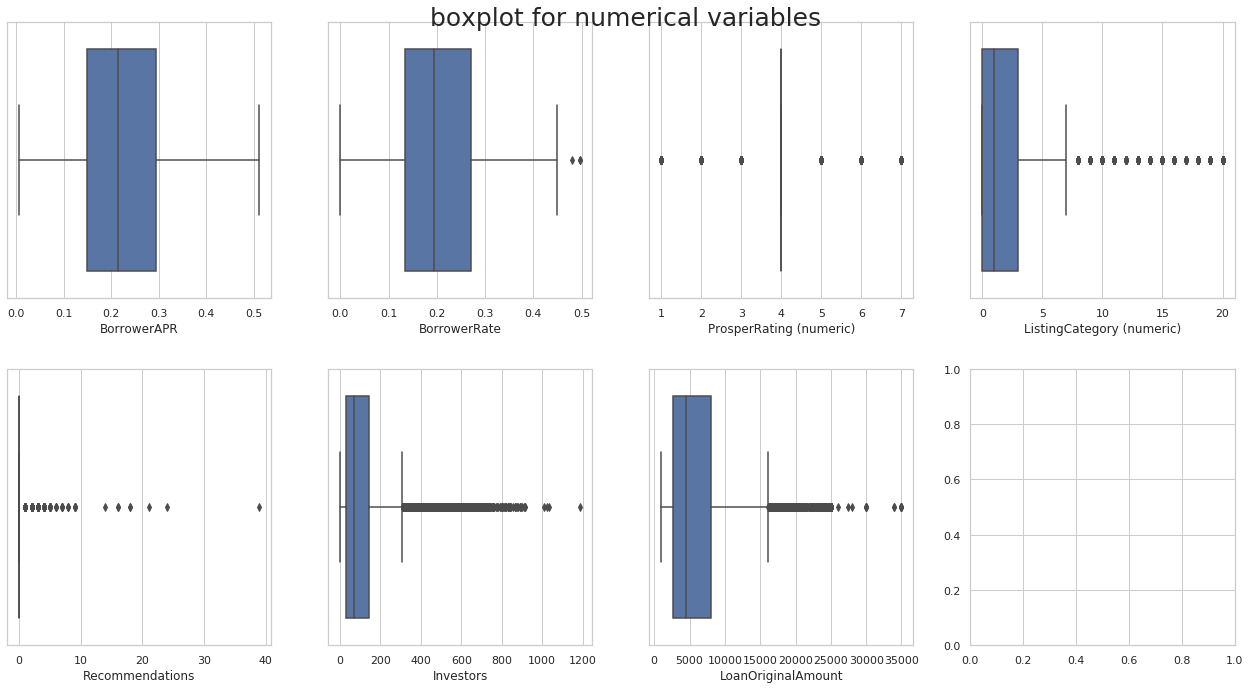

In [15]:
plt.subplots(2, 4,figsize=(18,10))

plt.subplots_adjust(top=1)
plt.suptitle("boxplot for numerical variables", fontsize=25) 


for i, col in enumerate(df2[numerical_vars]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df2[col]);
    plt.tight_layout(pad=3.0)


so we can see that 'Investors','LoanOriginalAmount' are having a lot of outliers, let's see if we can get rid of them

### LoanOriginalAmount

In [16]:
print(df2[df2['LoanOriginalAmount'] >= 13000].shape[0],",", df2.shape[0])
print(df2[df2['LoanOriginalAmount'] >= 13000].shape[0]/df2.shape[0])

6617 , 55089
0.12011472344751221


### Investors

In [17]:
print(df2[df2['Investors'] >= 250].shape[0],df2.shape[0])
print(df2[df2['Investors'] >= 250].shape[0]/df2.shape[0])

5236 55089
0.09504619797055673


we can get rid of outliers as their percentage are very small

In [18]:
df2 = df2[df2['Investors'] < 180]
df2 = df2[df2['LoanOriginalAmount'] < 8000]
df2.shape

(38570, 17)

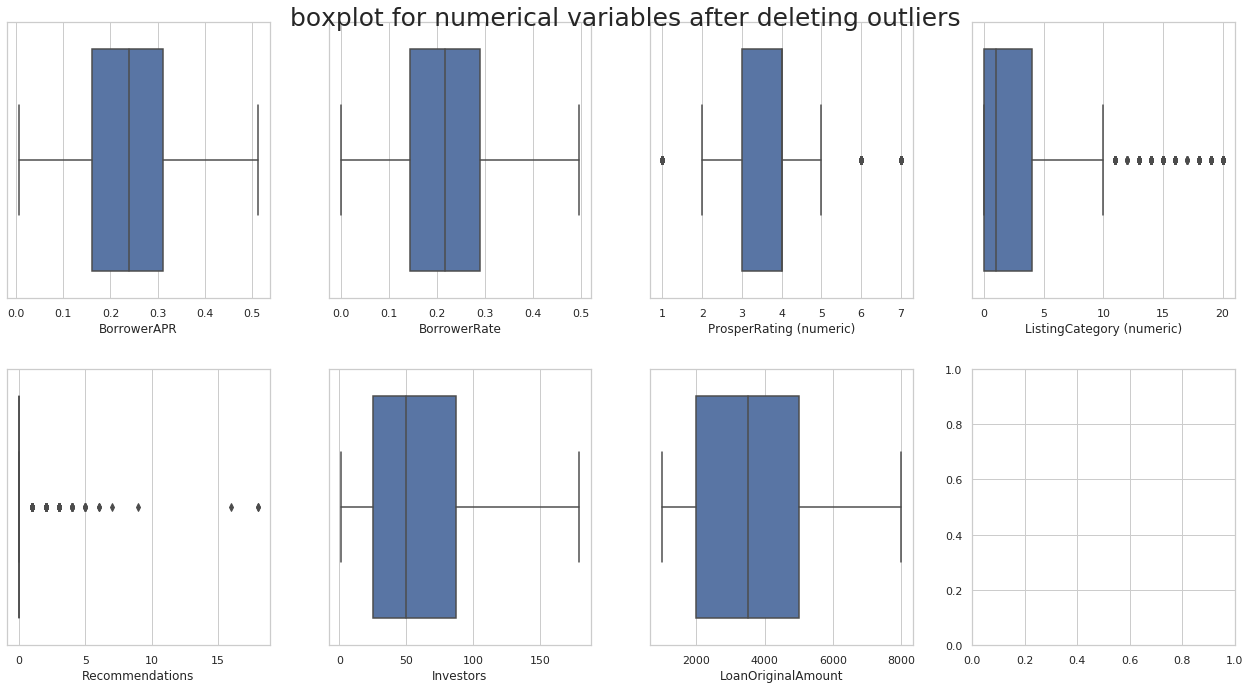

In [19]:
plt.subplots(2, 4,figsize=(18,10))

plt.subplots_adjust(top=1)
plt.suptitle("boxplot for numerical variables after deleting outliers", fontsize=25) 

for i, col in enumerate(df2[numerical_vars]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df2[col]);
    
    plt.tight_layout(pad=3.0)

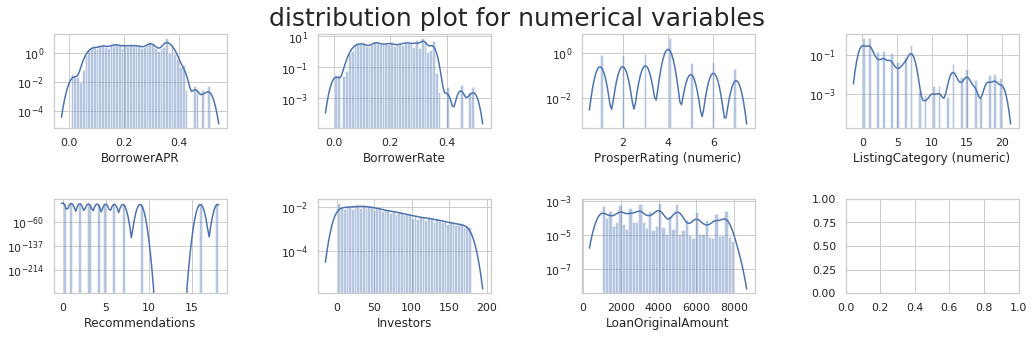

In [20]:
#we will use distplot instead of pairplot to show histograms with a line on them
plt.subplots(2, 4,figsize=(15,5))

plt.subplots_adjust(top=0.9)
plt.suptitle("distribution plot for numerical variables", fontsize=25) 

for i, col in enumerate(df2[numerical_vars]):
    plt.subplot(2, 4, i+1)
    sns.distplot(df2[col]);
    plt.tight_layout(pad=3.0)   
    plt.yscale('log')

this method of deleting outliers is not the best method as it is not accurate, we can also use interquartile range method or calculating z-score methods

### starting with categorical features


>we will generate the count plot for all categorical variables

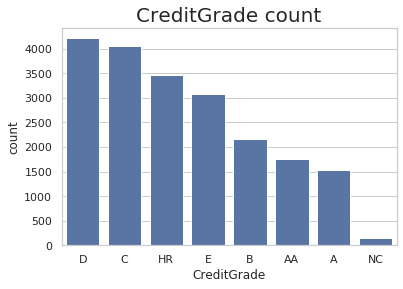

In [21]:
base_color = sns.color_palette()[0]

sns.countplot(df2.CreditGrade,color = base_color, order= df2.CreditGrade.value_counts().index)

plt.title("CreditGrade count",fontsize=20);


we can see that C is the most common rate for borrowers, C considered as average

we can found similar interpertaion for these symbols at these [link](https://www.hendrix.edu/academics/academics.aspx?id=1749#:~:text=A%20GPA%20credit%20indicates%20the,a%20GPA%20weight%20of%201.)

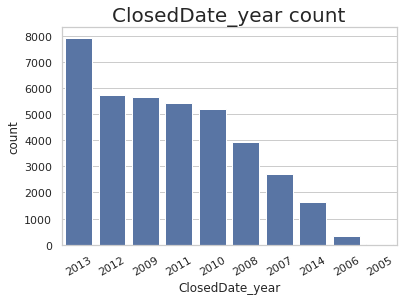

In [22]:
base_color = sns.color_palette()[0]

sns.countplot(df2.ClosedDate_year,color = base_color, order= df2.ClosedDate_year.value_counts().index)

plt.title("ClosedDate_year count",fontsize=20);

plt.tick_params(axis='x', rotation=30)

Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses, which means that 2013 have the most closed loan status wheither it is Cancelled, Completed or Chargedoff

also as the values increases over years so,the number of loan requests also increases

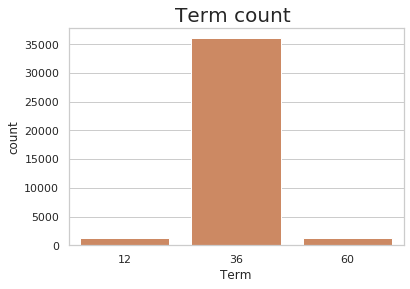

In [23]:
base_color = sns.color_palette()[1]

sns.countplot(df2.Term,color= base_color)

plt.title("Term count ",fontsize=20);


we can see that most of borrower prefer the 36 months' terms

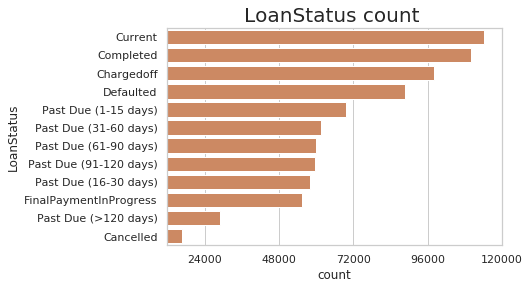

In [24]:
base_color = sns.color_palette()[1]

sns.countplot(y = df.LoanStatus,color= base_color, order= df.LoanStatus.value_counts().index)
plt.title("LoanStatus count ",fontsize=20);
plt.xscale('log')
plt.xticks([10, 100,1000,10000,100000],['24000', '48000', '72000', '96000','120000']);


we won't use df2 here because in df2 we have droped all nan values which would give misleading insight


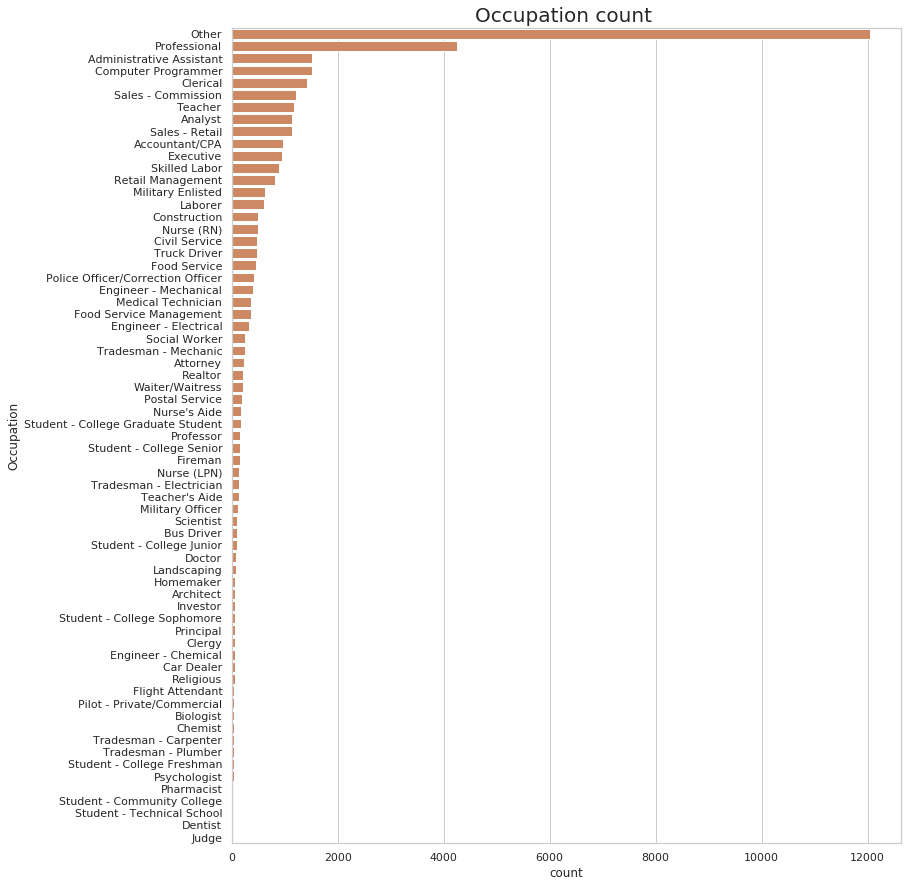

In [25]:
plt.figure(figsize=(12,15))

base_color = sns.color_palette()[1]

sns.countplot(y = df2.Occupation,color= base_color, order= df2.Occupation.value_counts().index)

plt.title("Occupation count ",fontsize=20);

the occupation bar that have the highest value is not a specified job

the first 3 interpretable job are computer programmers, administrative assistant and sales

In [26]:
df2.shape

(38570, 17)

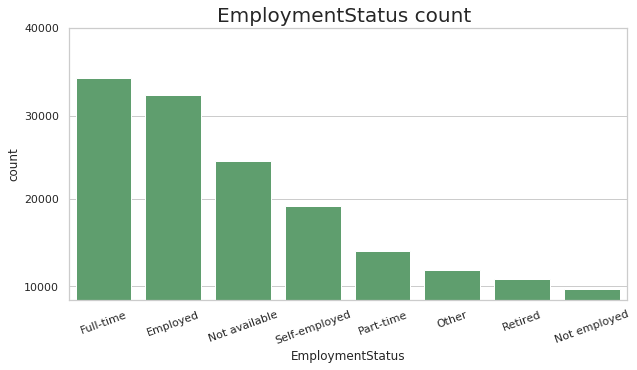

In [27]:
plt.figure(figsize=(10,5))
base_color = sns.color_palette()[2]

sns.countplot(df2.EmploymentStatus,color= base_color, order= df2.EmploymentStatus.value_counts().index)
plt.title("EmploymentStatus count ",fontsize=20);
plt.yscale('log')
plt.tick_params(axis='x', rotation=20)
plt.yticks([500, 2200,9000,40000],['10000', '20000', '30000', '40000']);


> as a first observation we can say that most of borrowers are trusted to accept thier requests as the number of not employed and retired are lower than others 

## to recap for Univariate section

> i used log transformation in almost all variables because they needed a larger than it was showed with

> these variables **ListingCategory (numeric)**, **Recommendations**, **Investors**,
       **LoanOriginalAmount** had outliers but we tried to get rid of variables which had a lot of outliers 

## Bivariate Exploration


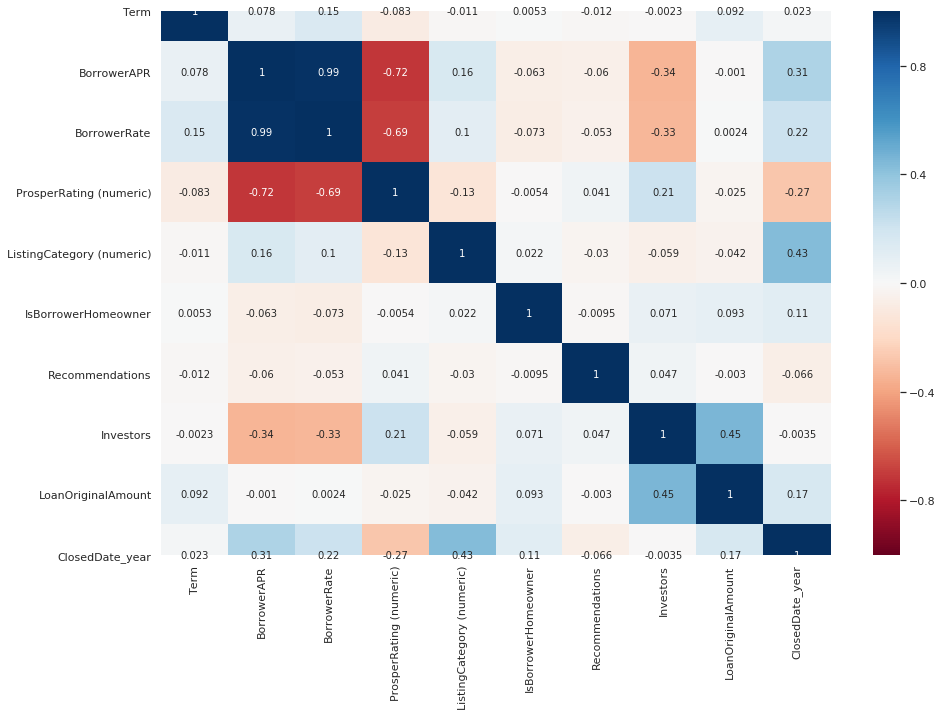

In [29]:
plt.figure(figsize=(15,10))

sns.heatmap(df2.corr(),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True);

we can see that there is a strong positive correlation between **BorrowerAPR** and **BorrowerRate**, also a strong negative correlation between **BorrowerAPR** and **ProsperRating (numeric)**

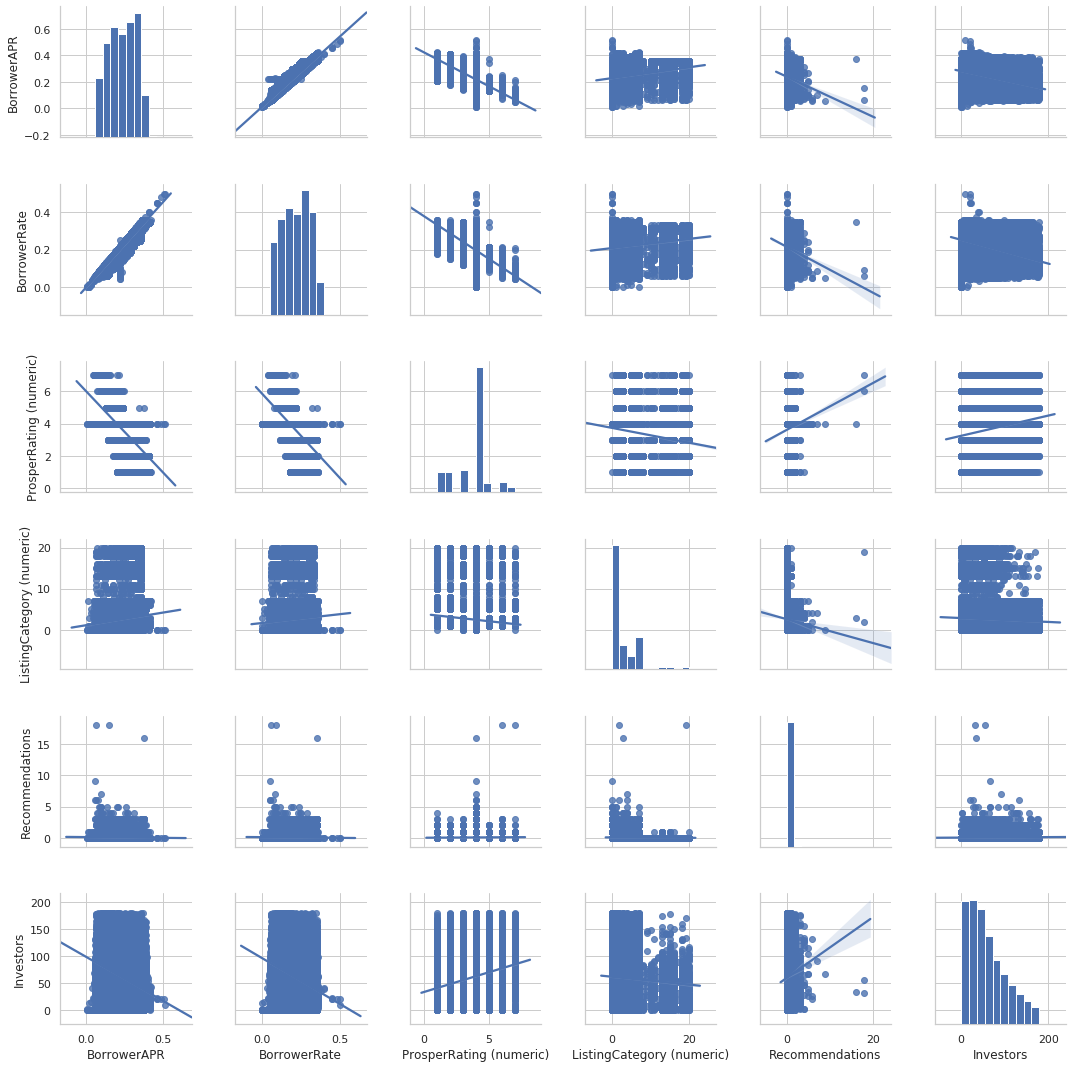

In [30]:
#no let's see the distribution of all feature and scatter plot between every two feature
sns.pairplot(df2[['BorrowerAPR','BorrowerRate','ProsperRating (numeric)','ListingCategory (numeric)'
                  , 'Recommendations','Investors']], kind="reg");

here, paiplot also emphasis the correlation between **BorrowerAPR** and **BorrowerRate** also **BorrowerAPR** and **ProsperRating (numeric)**

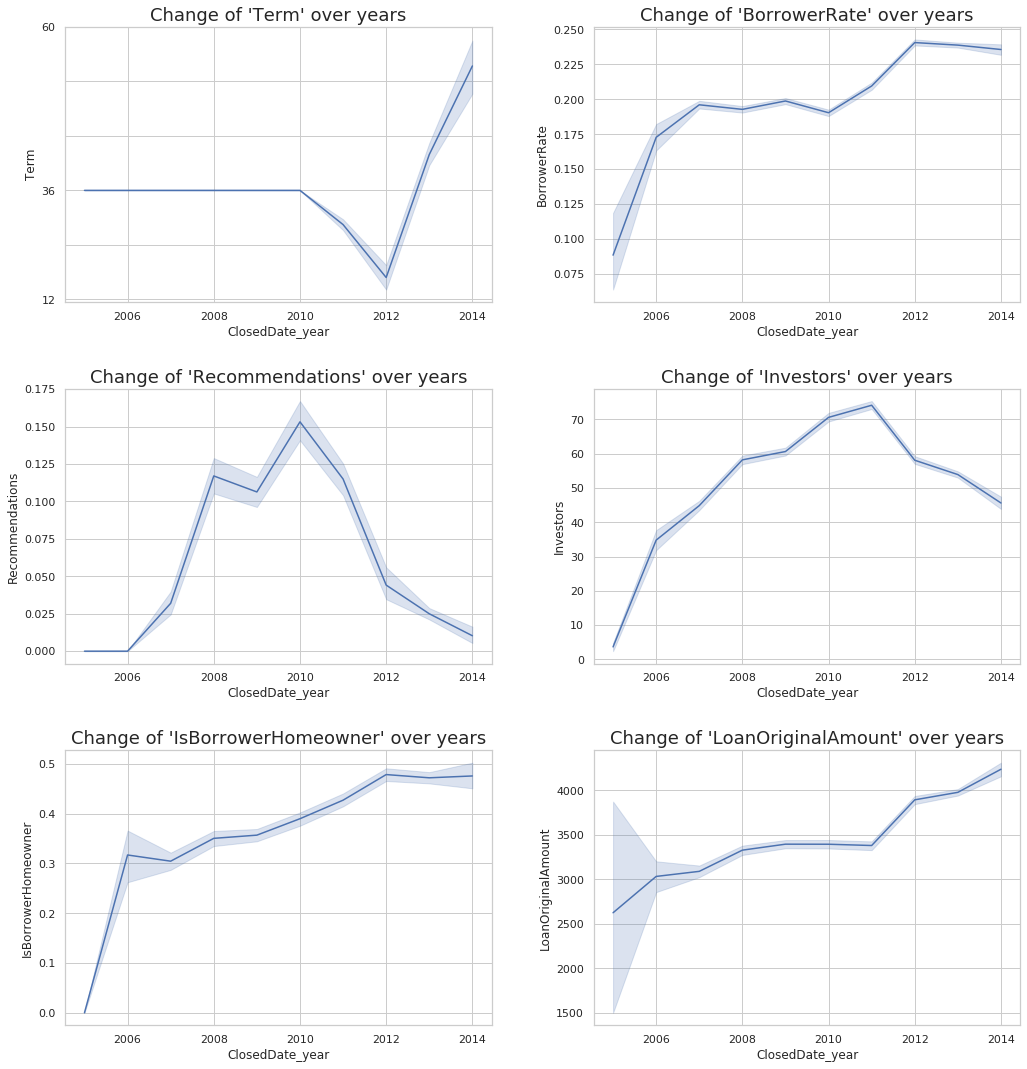

In [31]:
#now let's see changes in some of features according to 'ClosedDate_year'
base_color = sns.color_palette()[0]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[15, 20])


plt.subplot(4,2,1)
sns.lineplot(data = df2, x='ClosedDate_year', y = 'Term' ,color = base_color).set_title("Change of 'Term' over years", fontsize=18);
plt.yticks([34,35,36, 37,38,39],['12','','36', '','','60']);

plt.subplot(4,2,2)
sns.lineplot(data = df2, x='ClosedDate_year', y = 'BorrowerRate' ,color = base_color).set_title("Change of 'BorrowerRate' over years", fontsize=18);

plt.subplot(4,2,3)
sns.lineplot(data = df2, x='ClosedDate_year', y = 'Recommendations' ,color = base_color).set_title("Change of 'Recommendations' over years", fontsize=18);

plt.subplot(4,2,4)
sns.lineplot(data = df2, x='ClosedDate_year', y = 'Investors' ,color = base_color).set_title("Change of 'Investors' over years", fontsize=18);

plt.subplot(4,2,5)
sns.lineplot(data = df2, x='ClosedDate_year', y = 'IsBorrowerHomeowner' ,color = base_color).set_title("Change of 'IsBorrowerHomeowner' over years", fontsize=18);

plt.subplot(4,2,6)
sns.lineplot(data = df2, x='ClosedDate_year', y = 'LoanOriginalAmount' ,color = base_color).set_title("Change of 'LoanOriginalAmount' over years", fontsize=18);

fig.tight_layout(pad=3.0)

## Q1. What factors affect a LoanStatus and BorrowerRate?

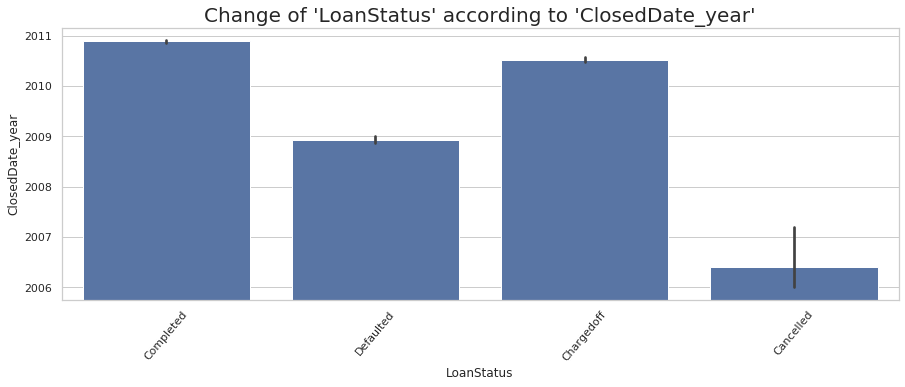

In [32]:
plt.figure(figsize=(15,5))
plt.title("Change of 'LoanStatus' according to 'ClosedDate_year'",fontsize=20)

sns.barplot(data = df2,y = 'ClosedDate_year',x = 'LoanStatus', color =sns.color_palette()[0])
plt.xticks(rotation = 50);
plt.yscale('log')
plt.yticks([2.006 * 1e3, 2.007* 1e3, 2.008* 1e3, 2.009* 1e3, 2.01* 1e3, 2.011* 1e3],['2006', '2007', '2008', '2009', '2010', '2011']);


we can see that starting from 2007 there aren't any loan cancelled, and completed and charged off loans are increasing together over years

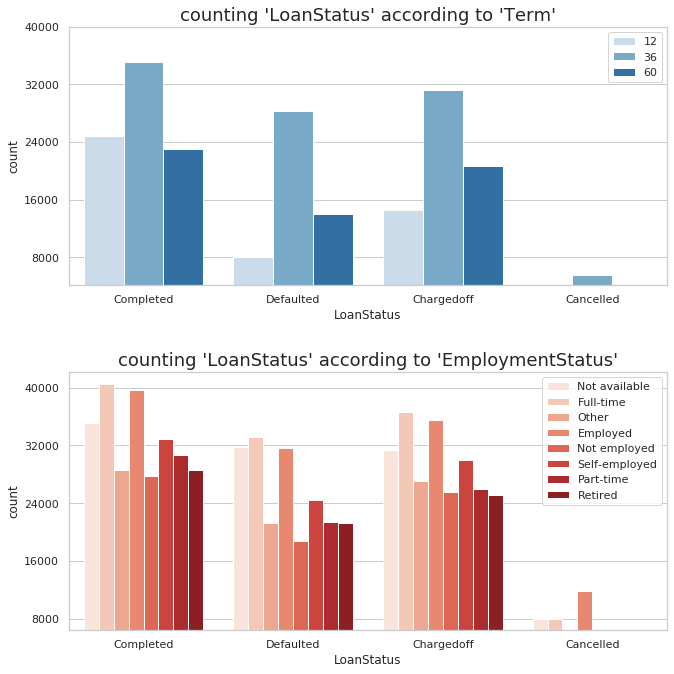

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=[10, 10])

plt.subplot(2,1,1)
sns.countplot(data =  df2, x= 'LoanStatus', hue = 'Term', palette = 'Blues').set_title("counting 'LoanStatus' according to 'Term'", fontsize=18);
plt.yscale('log')
plt.legend(loc = 1, ncol = 1)
plt.yticks([10, 100,1000,10000, 100000],['8000', '16000', '24000', '32000','40000']);


plt.subplot(2,1,2)
sns.countplot(data =  df2, x= 'LoanStatus', hue = 'EmploymentStatus', palette = 'Reds').set_title("counting 'LoanStatus' according to 'EmploymentStatus'", fontsize=18);
plt.legend(loc = 1, ncol = 1)
plt.yscale('log')
plt.yticks([1,10, 100,1000,10000],['8000', '16000', '24000', '32000','40000']);

fig.tight_layout(pad=3.0)

**for first plot**
>we could see that 36 months term is the most frequent term selected by applicants.

>also no applicants who choose 12 and 60 months term have cancelled the request.

**for second plot**
>Full-time is the most frequent Employment Status for applicants, "Not available"and "others" are the second after Full-time but won't consider them as they are not interpretable.

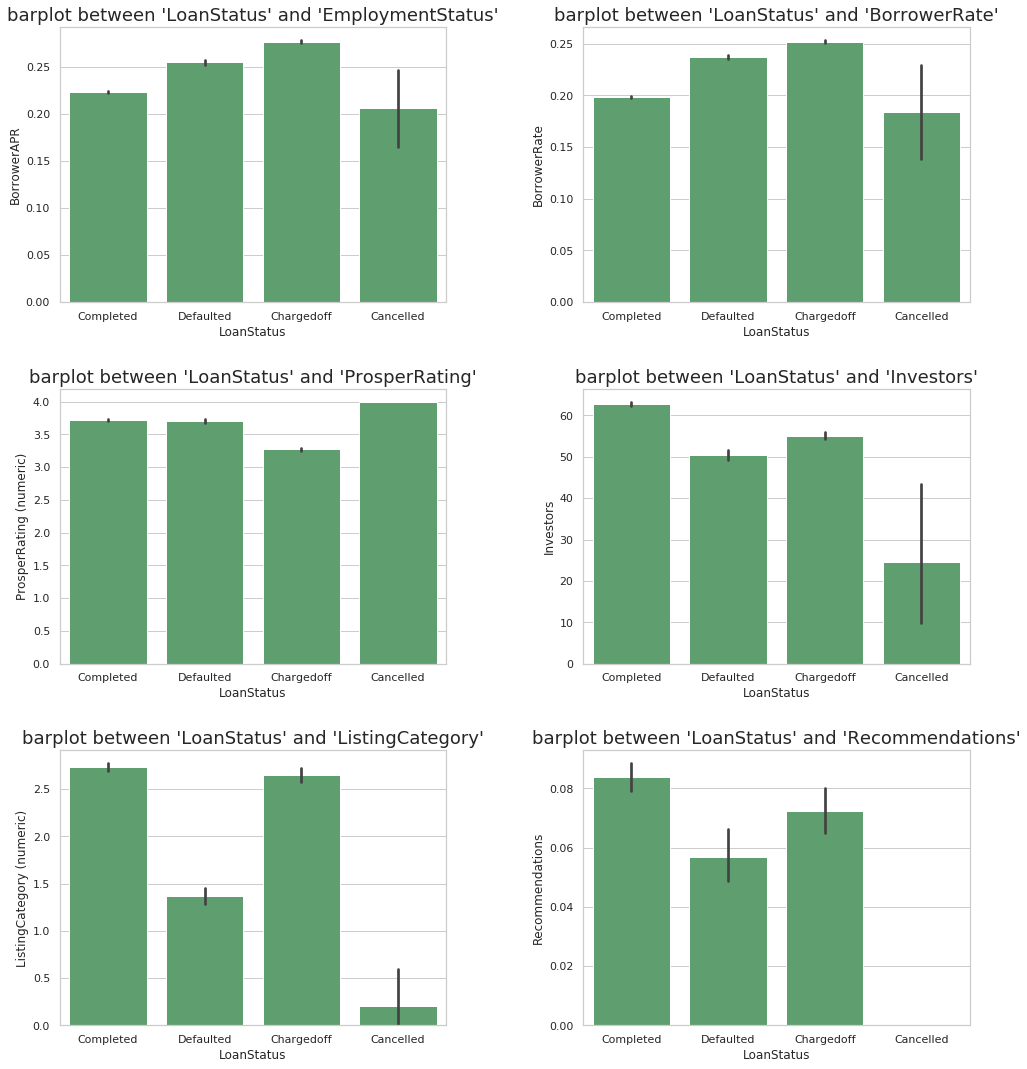

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[15, 20])

plt.subplot(4,2,1)
sns.barplot(data = df2, x= 'LoanStatus', y= 'BorrowerAPR', color = sns.color_palette()[2]).set_title("barplot between 'LoanStatus' and 'EmploymentStatus'", fontsize=18);

plt.subplot(4,2,2)
sns.barplot(data = df2, x= 'LoanStatus', y= 'BorrowerRate', color = sns.color_palette()[2]).set_title("barplot between 'LoanStatus' and 'BorrowerRate'", fontsize=18);

plt.subplot(4,2,3)
sns.barplot(data = df2, x= 'LoanStatus', y= 'ProsperRating (numeric)', color = sns.color_palette()[2]).set_title("barplot between 'LoanStatus' and 'ProsperRating'", fontsize=18);

plt.subplot(4,2,4)
sns.barplot(data = df2, x= 'LoanStatus', y= 'Investors', color = sns.color_palette()[2]).set_title("barplot between 'LoanStatus' and 'Investors'", fontsize=18);

plt.subplot(4,2,5)
sns.barplot(data = df2, x= 'LoanStatus', y= 'ListingCategory (numeric)', color = sns.color_palette()[2]).set_title("barplot between 'LoanStatus' and 'ListingCategory'", fontsize=18);

plt.subplot(4,2,6)
sns.barplot(data = df2, x= 'LoanStatus', y= 'Recommendations', color = sns.color_palette()[2]).set_title("barplot between 'LoanStatus' and 'Recommendations'", fontsize=18);


fig.tight_layout(pad=3.0)

- **cancelled** have the lowest frequency over all categories except for **ProsperRating (numeric)**

- for **BorrowerAPR** and **BorrowerRate** we can see that most of the applicants reach to the charging off phase

- applicants who came with **Recommendations** and **investors** are most likely to complete their loan



<Figure size 720x720 with 0 Axes>

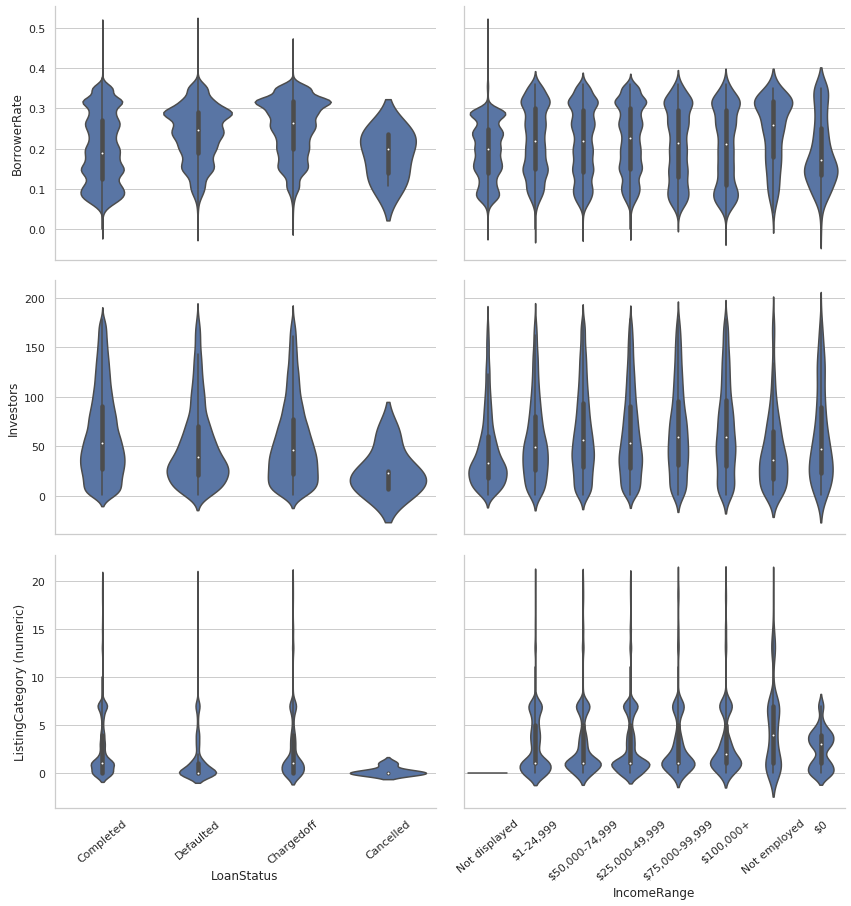

In [35]:
#we can generate violinplot to show The five-number summary which are a set of descriptive statistics that provides information about a dataset. It consists of the five most important sample percentiles :min, first quartile, the median, third quartile, max
def violingrid(x, y, **kwargs):
    """ Quick hack for creating violin plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.violinplot(x, y, color = default_color);

plt.figure(figsize = [10, 10]);
g = sns.PairGrid(data = df2, y_vars = ['BorrowerRate','Investors','ListingCategory (numeric)']
                 , x_vars = ['LoanStatus','IncomeRange'],
                height = 4, aspect = 1.5);

g.map(violingrid);

for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation = 40);
    
plt.show();

## to recap for Bivariate section
> so as we saw, **BorrowerRate** is correlated with **BorrowerAPR** and **ProsperRating (numeric)**

>**Recommendations** and **investors** are having effect on **LoanStatus** which help applicants to complete their loan

>most of applicants are choosing 36 months **Term**


## Multivariate Exploration


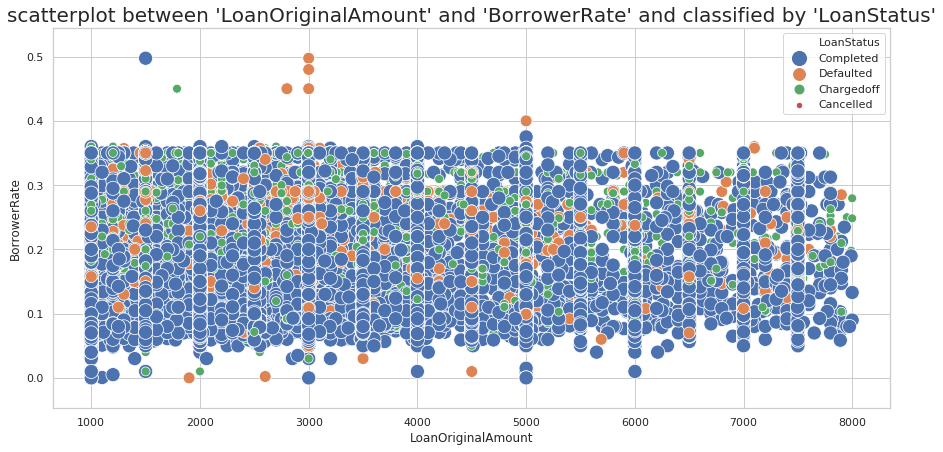

In [36]:
fig = plt.figure(figsize = [15,7])
plt.title("scatterplot between 'LoanOriginalAmount' and 'BorrowerRate' and classified by 'LoanStatus'",fontsize=20);

sns.scatterplot(data = df2, x = 'LoanOriginalAmount', y = 'BorrowerRate'
                , hue = 'LoanStatus',size = 'LoanStatus',sizes=(20,200));


completed class may not show other classes because of the size, let's try inverse the range of size to see the other classes 

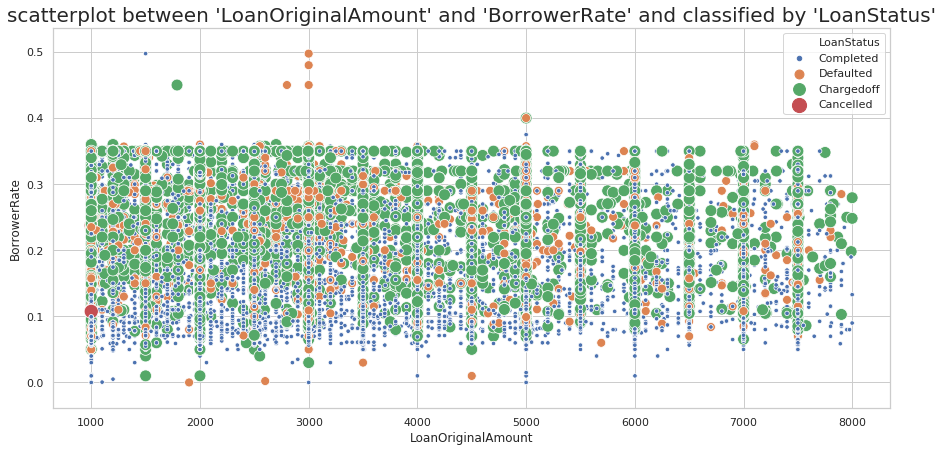

In [37]:
fig = plt.figure(figsize = [15,7])
plt.title("scatterplot between 'LoanOriginalAmount' and 'BorrowerRate' and classified by 'LoanStatus'",fontsize=20);

sns.scatterplot(data = df2, x = 'LoanOriginalAmount', y = 'BorrowerRate'
                , hue = 'LoanStatus',size = 'LoanStatus',sizes=(200,20));


let's plot each class in LoanStatus individually

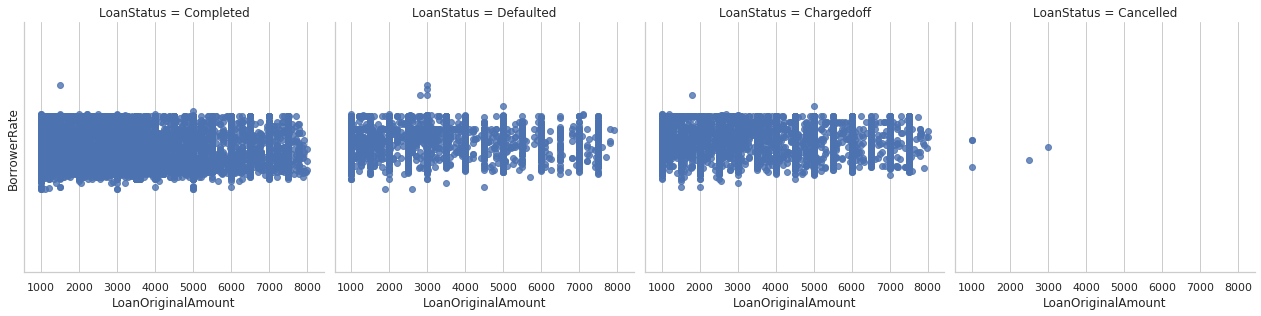

In [38]:
#d = {'color': ['y', 'b','g','r']}
g = sns.FacetGrid(data = df2, col = 'LoanStatus', height = 4.5,
                margin_titles = True);
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate',scatter = True, fit_reg = False);
g.set(ylim=(-0.4, 0.8), yticks=[500, 3, 4000]);

as we clarified previouslly, completed category is the most frequent one, also we can se few points considered as an outliers for **BorrowerRate** and **LoanOriginalAmount** plot

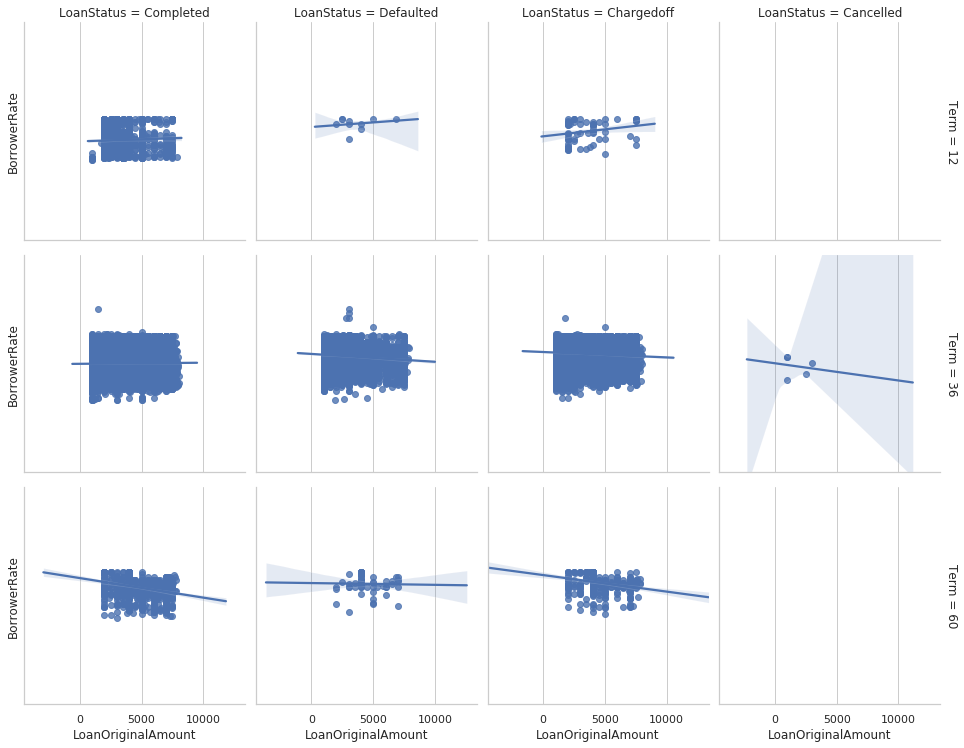

In [39]:
#showing relation between 'LoanOriginalAmount'and 'BorrowerRate' classified by 'LoanStatus' and 'Term'"
g = sns.FacetGrid(data = df2, col = 'LoanStatus', row = 'Term', height = 3.5,
                margin_titles = True);
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate',scatter = True);
g.set(ylim=(-0.4, 0.8), yticks=[500, 3, 4000]);


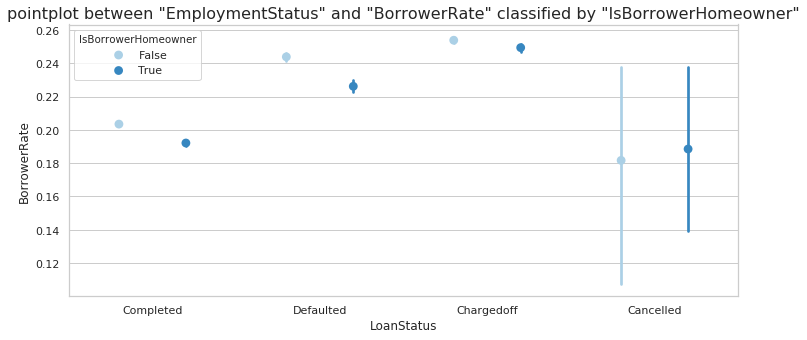

In [40]:
#pointplot is similar to violin and boxplot, used to add a categorical third variable to those plots in a clustered fashion
fig = plt.figure(figsize = [12,5])
ax = sns.pointplot(data = df2, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.title('pointplot between "EmploymentStatus" and "BorrowerRate" classified by "IsBorrowerHomeowner"', fontsize = 16)

plt.show();

so, **IsBorrowerHomeowner** could be considered only when we try to investigate cancelled class

## Q2. Are there differences between loans depending on how large the original loan amount was?

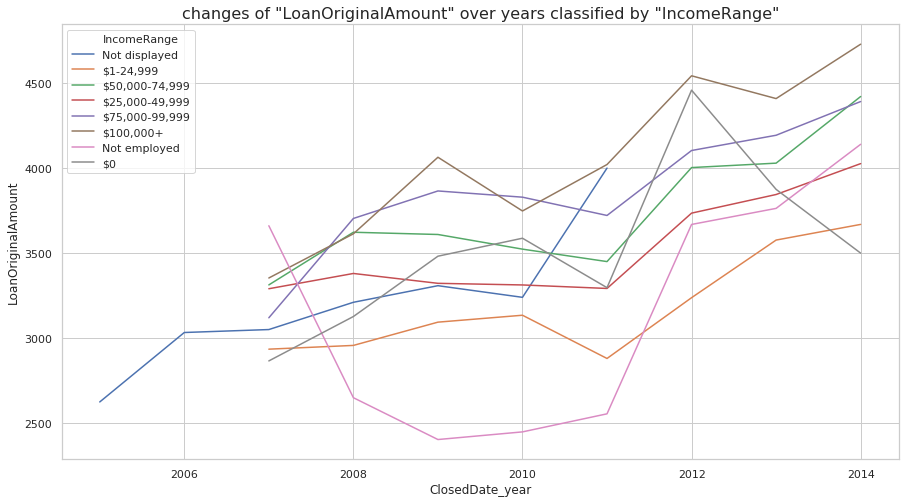

In [41]:
plt.figure(figsize = [15,8])
plt.title('changes of "LoanOriginalAmount" over years classified by "IncomeRange"', fontsize = 16)

sns.lineplot(data = df2, x='ClosedDate_year', y = 'LoanOriginalAmount' 
             , hue = 'IncomeRange', style="IncomeRange", dashes=False, ci=None);


>as we can see, when **IncomeRange** +100,000 ,the **LoanOriginalAmount** is getting higher more than any other income range over years

>when **IncomeRange** is not employed ,the **LoanOriginalAmount** is the lowest over years which is logically interpreted

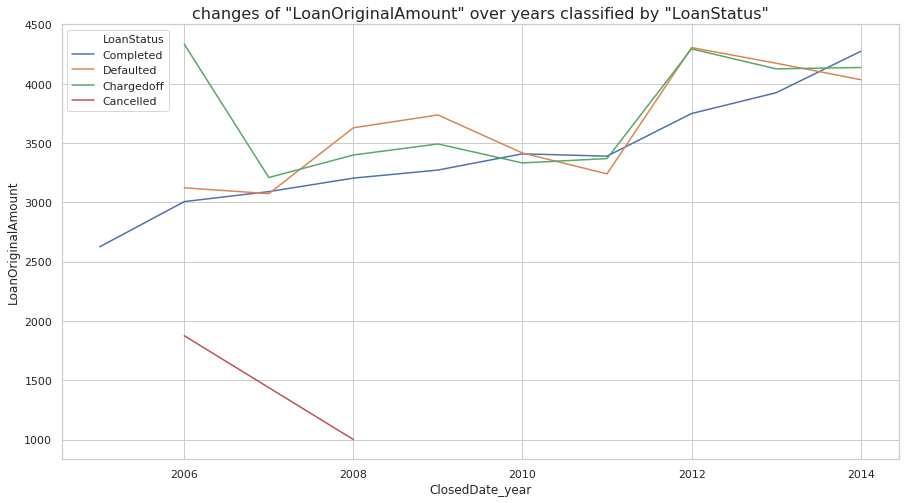

In [42]:
plt.figure(figsize = [15,8])
plt.title('changes of "LoanOriginalAmount" over years classified by "LoanStatus"', fontsize = 16)

sns.lineplot(data = df2, x='ClosedDate_year', y = 'LoanOriginalAmount' 
             , hue = 'LoanStatus', style="LoanStatus", dashes=False, ci=None);

>as we figuered before, very small number of cancelled loans happend

>we can see also that the changes happened over years to defaulted and chargedoff loans are almost the same

## Conclusion


### Q1. What factors affect a LoanStatus and BorrowerRate?

for LoanStatus

>**Recommendations** and **investors** are having effect on LoanStatus which help applicants to complete their loan

>for relation between **LoanStatus** and **EmploymentStatus**, if the applicant is employed then the chance to cancel his request is very small

>the same for **IsBorrowerHomeowner**, which makes sense


for BorrowerRate

>from heat map, **BorrowerRate** is stronge positive correlated with **BorrowerAPR** 

>there is a negative correleation between **BorrowerRate** and **ProsperRating (numeric)**,**Recommendations**,**Investors**


### Q2. Are there differences between loans depending on how large the original loan amount was?

>with the increase of LoanOriginalAmount over years, the completed loans are increasing 

>defaulted and chargedoff loans are going ups and downs, but they are changing in the same form

>cancelled loans are very small and we didn't find any starting with 2010